# Drifter data
1) Get data from opendap
2) Output GeoJson with locations and timestamp

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import netCDF4 as nc
import geojson
import json
import urllib
import re
import datetime

## 1) Get dataset from opendap

In [2]:
urls = []
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/ebb_01_10_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/ebb_02_10_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/ebb_13_10_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/ebb_15_10_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/ebb_17_10_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/ebb_23_09_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/ebb_30_09_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/flood_01_10_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/flood_02_10_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/flood_13_10_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/flood_15_10_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/flood_17_10_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/flood_18_10_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/flood_23_09_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/flood_30_09_2014.nc')

print(len(urls))

15


In [19]:
# define 15 colormaps
cmaps = ['Greys','Blues','Greens','bone']
print(len(cmaps))

4


processing drifters_ebb_01_10_2014
processing drifters_ebb_02_10_2014
processing drifters_ebb_13_10_2014
processing drifters_ebb_15_10_2014
processing drifters_ebb_17_10_2014
processing drifters_ebb_23_09_2014
processing drifters_ebb_30_09_2014
processing drifters_flood_01_10_2014
processing drifters_flood_02_10_2014
processing drifters_flood_13_10_2014
processing drifters_flood_15_10_2014
processing drifters_flood_17_10_2014
processing drifters_flood_18_10_2014
processing drifters_flood_23_09_2014
processing drifters_flood_30_09_2014


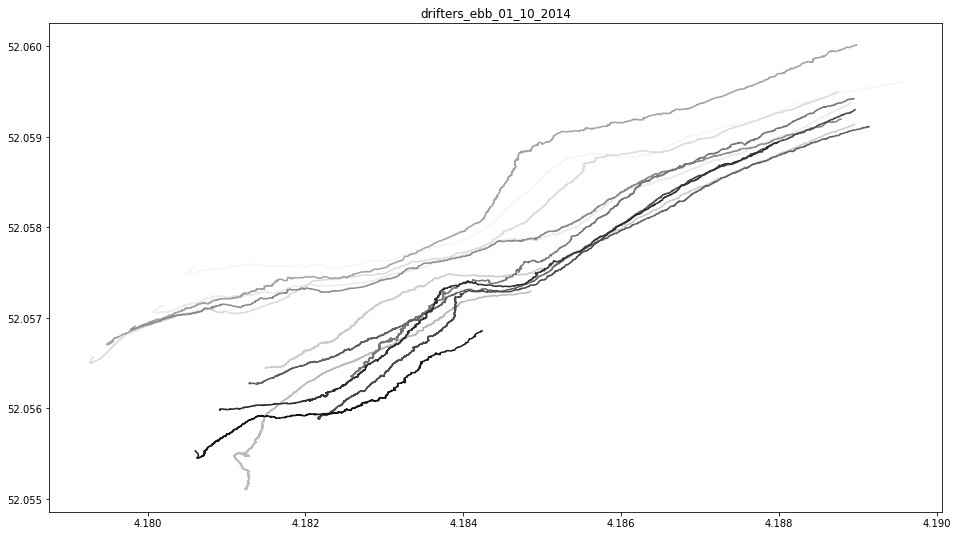

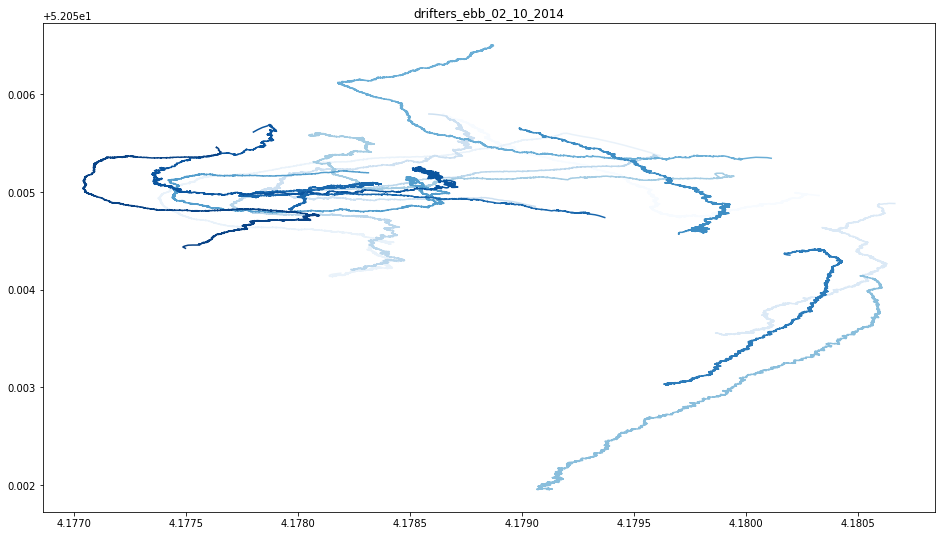

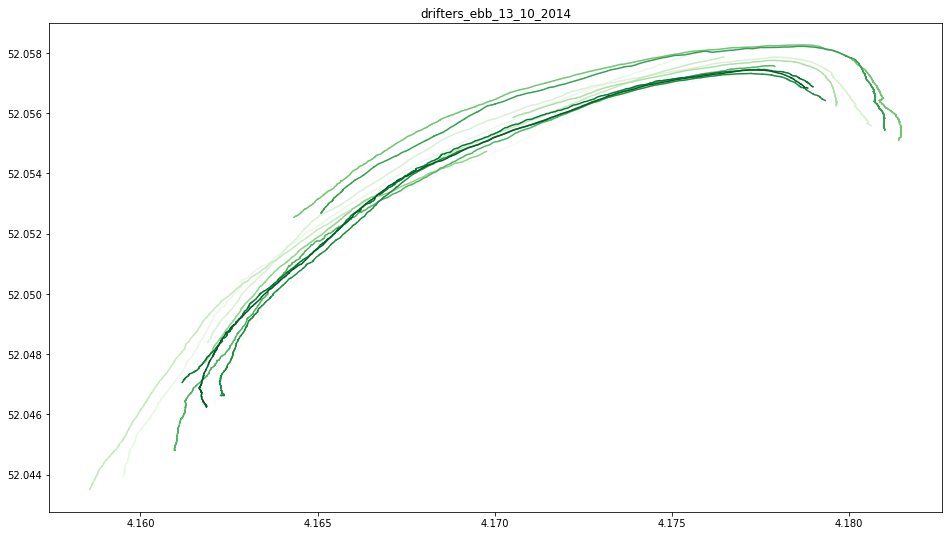

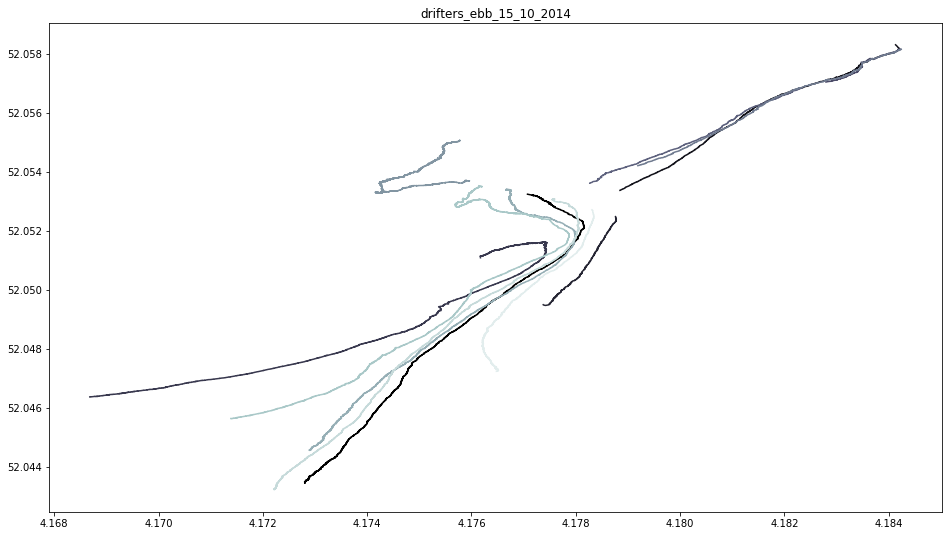

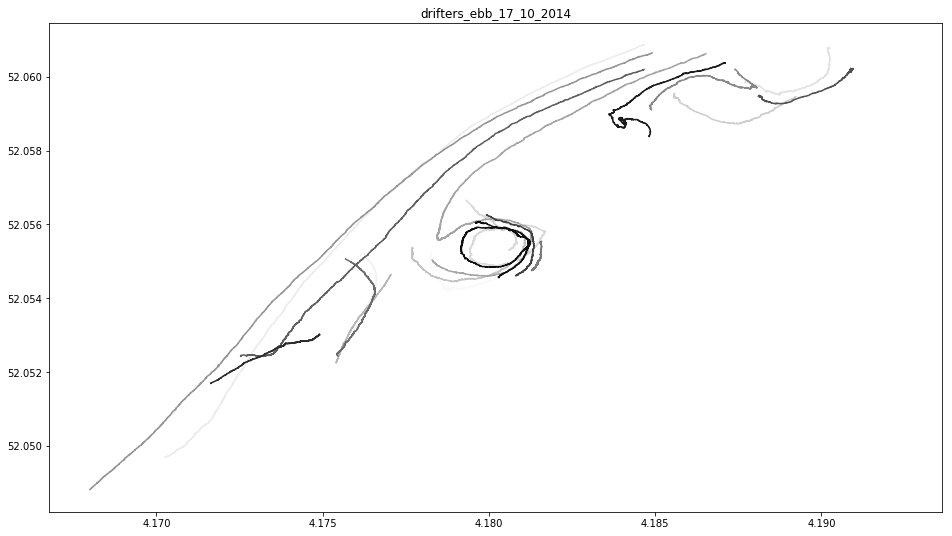

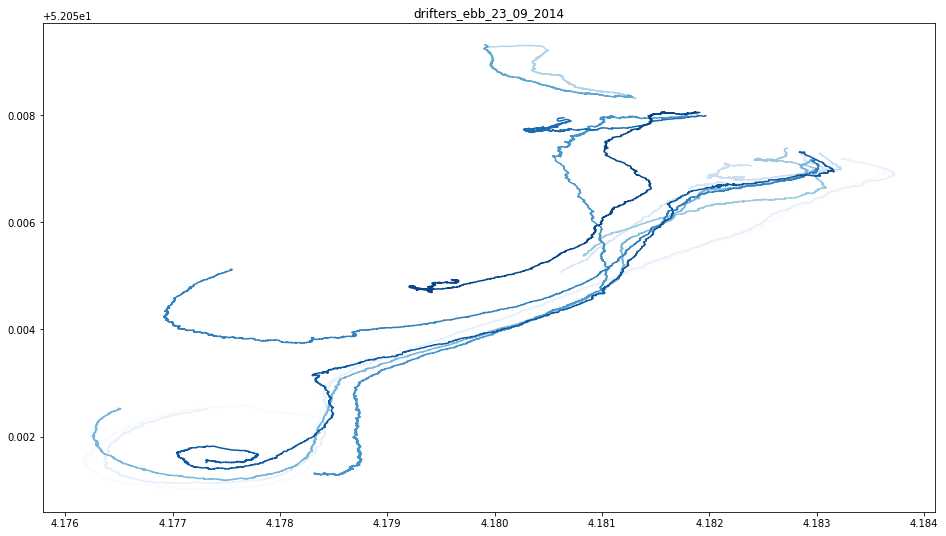

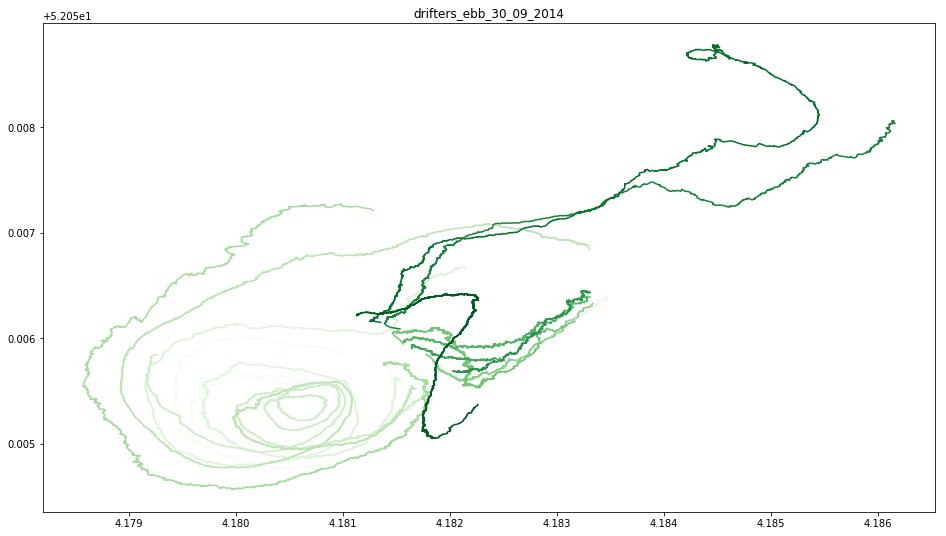

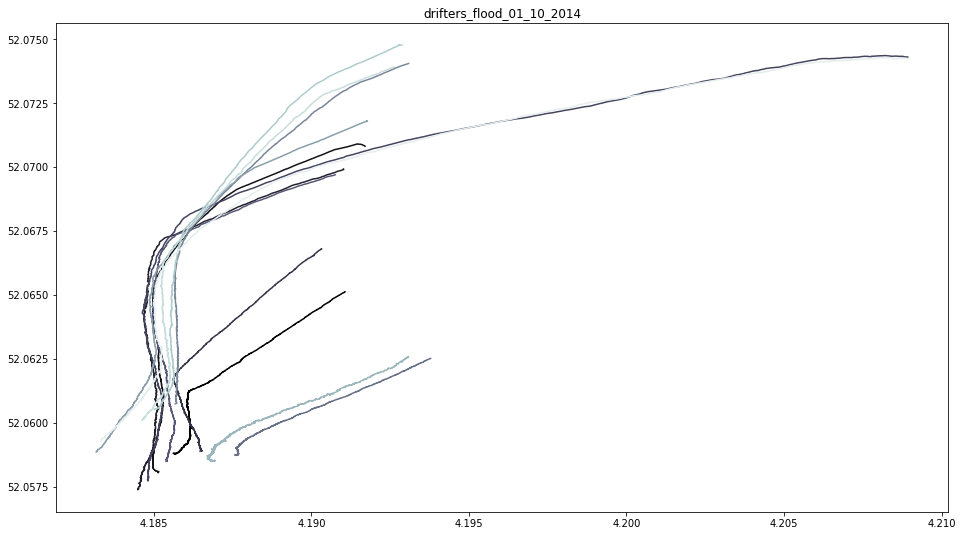

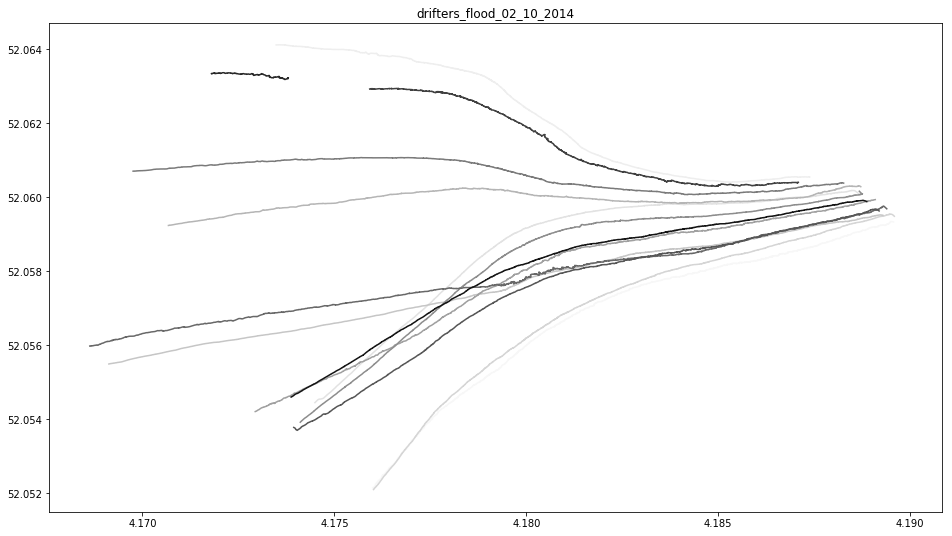

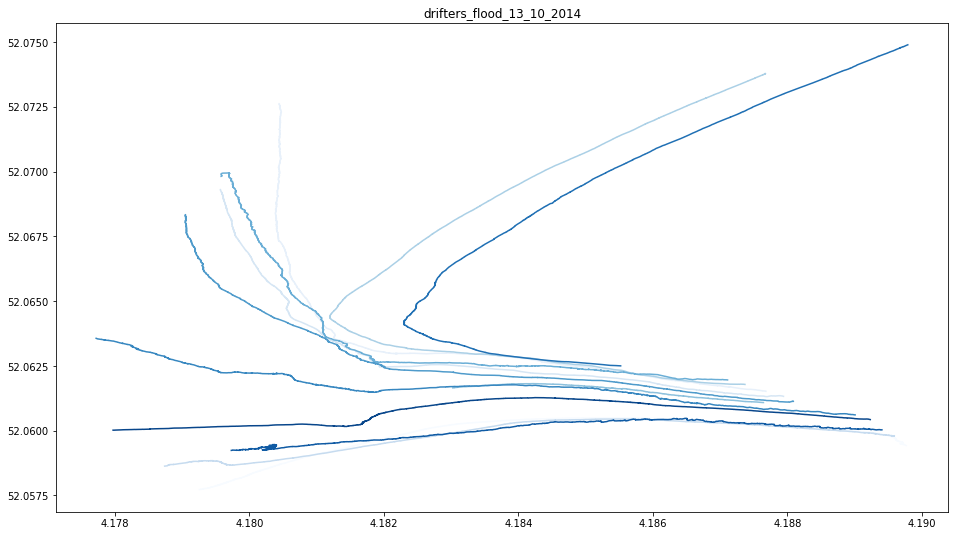

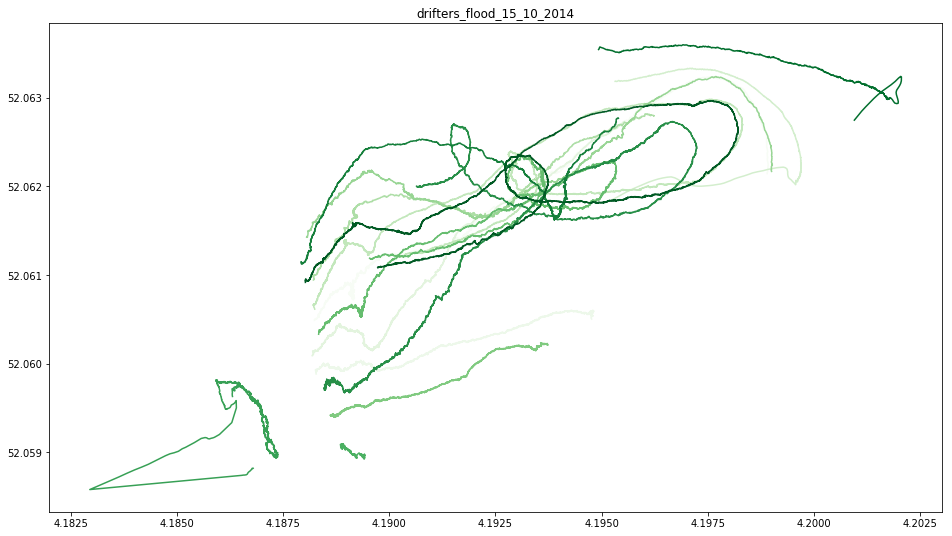

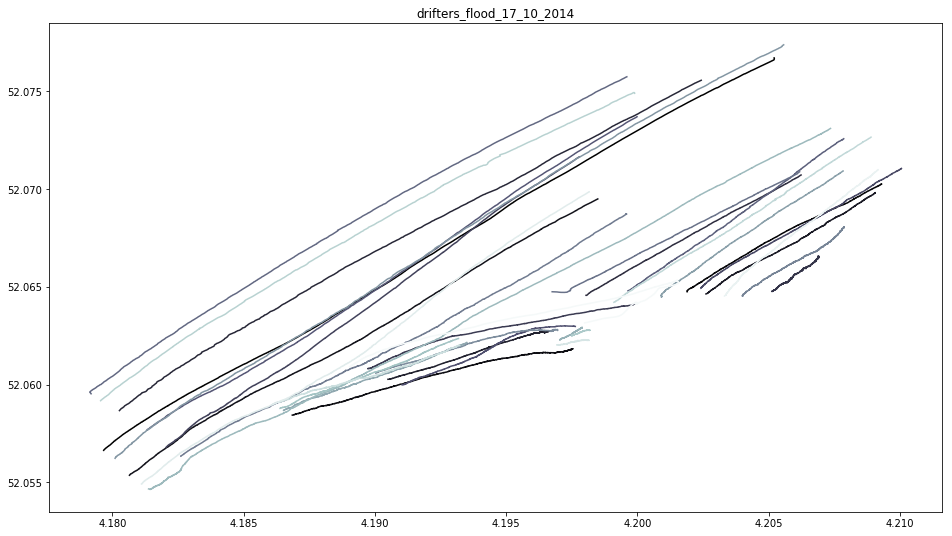

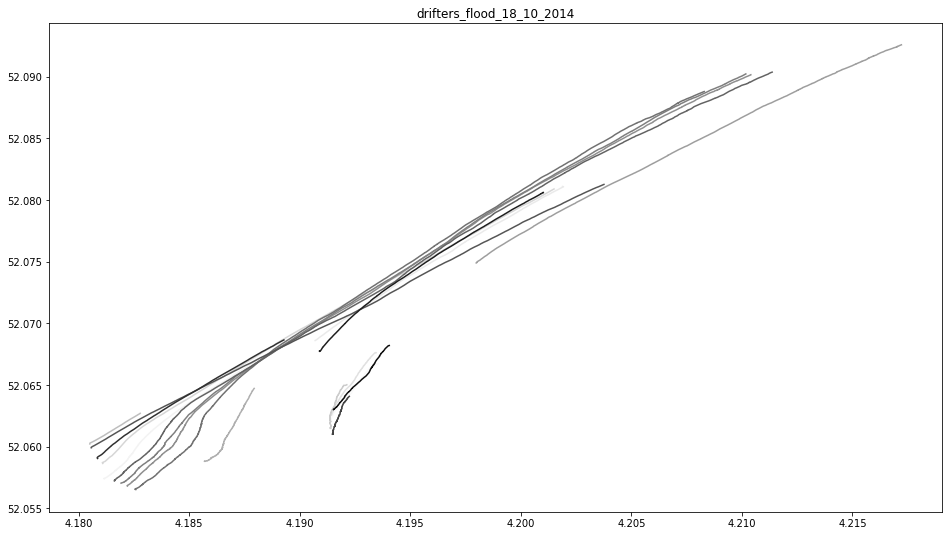

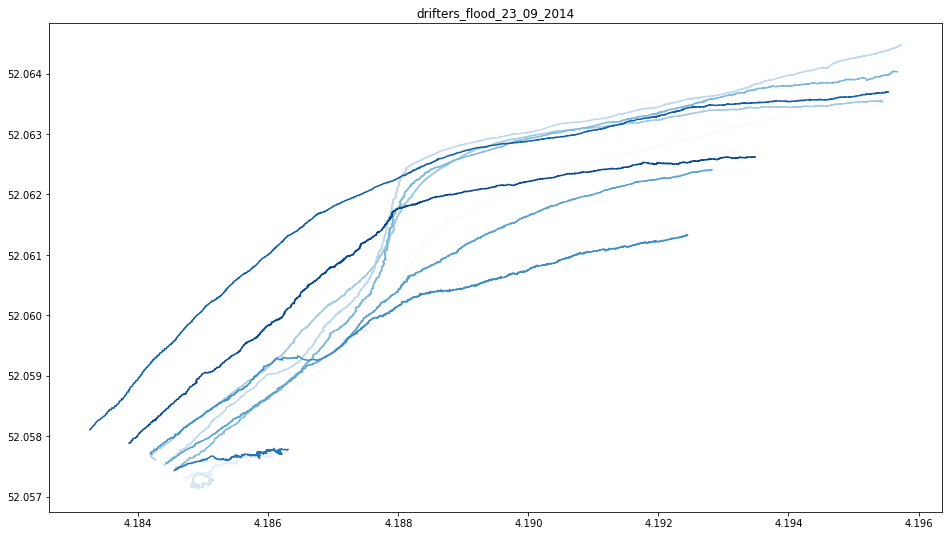

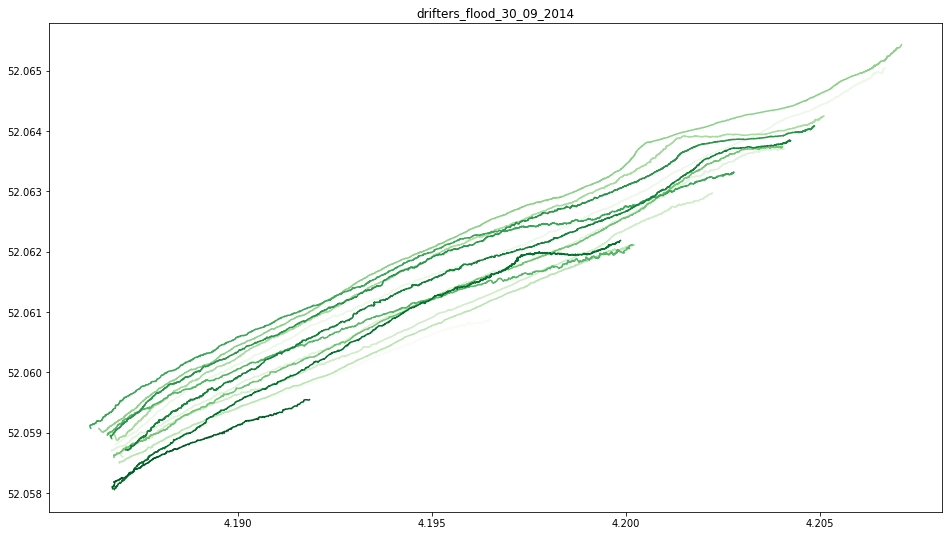

In [20]:
features = []
cmapcounter = 0
for j in range(len(urls)):
    url = urls[j]
    
    cmap = matplotlib.cm.get_cmap(cmaps[cmapcounter])
    
    if cmapcounter >= len(cmaps)-1:
        cmapcounter = 0
    else:
        cmapcounter += 1
        
    dataset = nc.Dataset(url)
    dataset.set_auto_mask(False)

    # get deployment name
    deploymentID = dataset.id
    print('processing', deploymentID)
    
    plt.figure(figsize=(16,9))
    plt.title(deploymentID)

    for i in range(np.shape(dataset['lat'])[1]):

        lat = dataset['lat'][:,i] # [locations, drifter]
        lat = lat[~np.isnan(lat)].tolist()
        lon = dataset['lon'][:,i]
        lon = lon[~np.isnan(lon)].tolist()

        time = dataset['time'][:,i]
        time = time[~np.isnan(time)].tolist()
        for j in range(len(time)):
            time[j] = int(time[j])

        color = matplotlib.colors.to_hex(cmap(i/float(np.shape(dataset['lat'])[1])))
        line = geojson.LineString(zip(lon,lat))
        
        plt.plot(lon,lat,color=color)
        feature = geojson.Feature(geometry = line, properties={'tStart':int(np.min(time)),'tEnd':int(np.max(time)),'color':color})
        features.append(feature)

# to json
f = open('%s/%s' %('../static', 'Drifters.geojson'),'w')
f.write(json.dumps(geojson.FeatureCollection(features)))
f.close()